## Reinforcement Learning: Project 1
## Multi-armed Bandits

The purpose of the first part of this project is to verify the results of running multiarmed bandits with Epsilon greedy iterations of 0 (greedy), 0.1 and 0.01. The result will be a line chart showing the average rewards distributions over 1000 steps for 2000 tasks. The second part of this project is to ingest a dataset and determine the same average reward distributions over 10,000 steps for 500 tasks.

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [66]:
class bandit:
    def __init__(self, arms, type, steps):
        self.n = 0
        self.steps = steps
        self.arms = arms
        self.type = type
        self.mean_r = 0

        self.arm_n = np.zeros(arms)
        self.reward = np.zeros(steps)
        self.arm_r = np.zeros(arms)
        # unknown mean reward of a action
        self.meansdist = np.random.normal(0, 1, arms)
        # cumulative reward counter for ds
        #self.cumreward = 0
        self.cumrewardarm = np.zeros(arms)

    def run(self, ds): 
        for i in range(self.steps):
            # find random numbers and determine arm choice
            rn = np.random.rand()             
            if rn < self.type:
                act = np.random.choice(self.arms)
            else:
                act = np.argmax(self.arm_r)

            # increment counters
            self.n += 1
            self.arm_n[act] += 1
            
            # determine reward from Gaussian distribution with q*(a) as mean as varaiance 1
            if isinstance(ds, pd.DataFrame):
                reward = ds.iat[i, act]
            else:
                reward = np.random.normal(self.meansdist[act], 1)                

            # determine the mean reward and reward for the arm chosen
            self.mean_r = self.mean_r + (reward - self.mean_r) / self.n
            self.arm_r[act] = self.arm_r[act] + (reward - self.arm_r[act]) / self.arm_n[act]
        
            # update the reward array for each step
            self.reward[i] = self.mean_r

            # cumulative reward counter for ds
            #if isinstance(ds, pd.DataFrame):
            #self.cumreward += reward
            self.cumrewardarm[act] += reward
    
    def reset(self):
        self.n = 0
        self.arm_n = np.zeros(self.arms)
        self.mean_r = 0
        self.reward = np.zeros(self.steps)
        self.arm_r = np.zeros(self.arms)
    

In [67]:
def executeLearning(arms, steps, tasks, ds):
    # establish the number of arms, steps and tasks
    arms = arms
    steps = steps
    tasks = tasks

    # set up the long-term reward arrays for each type
    greedy_r = np.zeros(steps)
    ep01_r = np.zeros(steps)
    ep1_r = np.zeros(steps)

    # task reward ds
    greedy_taskr = np.zeros(tasks)
    ep01_taskr = np.zeros(tasks)
    ep1_taskr = np.zeros(tasks)

    # hold max values for each arm over tasks
    greedy_cumrewardarm = np.zeros(arms)
    ep01_taskr_cumrewardarm = np.zeros(arms)
    ep1_taskr_cumrewardarm = np.zeros(arms)

    # list to hold cumrewardarm arrays
    armrewards = []

    for i in range(tasks):
        # initialize each type
        greedy = bandit(arms, 0, steps)
        e01 = bandit(arms, 0.01, steps)
        e1 = bandit(arms, 0.1, steps)

        # run learning action (pull arm) this is done the number of steps times
        greedy.run(ds)
        e01.run(ds)
        e1.run(ds)

        # deteremine the long-term rewards
        greedy_r = greedy_r + (greedy.reward - greedy_r) / (i + 1)
        ep01_r = ep01_r + (e01.reward - ep01_r) / (i + 1)
        ep1_r = ep1_r + (e1.reward - ep1_r) / (i + 1)

        #greedy_taskr[i] = greedy.cumreward
        #ep01_taskr[i] = e01.cumreward
        #ep1_taskr[i] = e1.cumreward

        # determine max values for each arm in cumrewardarm
        for c in range(len(greedy.cumrewardarm)):
            if greedy.cumrewardarm[c] > greedy_cumrewardarm[c]:
                greedy_cumrewardarm[c] = greedy.cumrewardarm[c]

        # determine max values for each arm in cumrewardarm
        for c in range(len(e01.cumrewardarm)):
            if e01.cumrewardarm[c] > ep01_taskr_cumrewardarm[c]:
                ep01_taskr_cumrewardarm[c] = e01.cumrewardarm[c]

        # determine max values for each arm in cumrewardarm
        for c in range(len(e1.cumrewardarm)):
            if e1.cumrewardarm[c] > ep1_taskr_cumrewardarm[c]:
                ep1_taskr_cumrewardarm[c] = e1.cumrewardarm[c]
        
    # create multidimensional array to hold cumrewardarm vals
    armrewards.append(greedy_cumrewardarm)
    armrewards.append(ep01_taskr_cumrewardarm)
    armrewards.append(ep1_taskr_cumrewardarm)
    
    #max_r = np.amax(np.array([np.amax(greedy_taskr), np.amax(ep01_taskr), np.amax(ep1_taskr)]))

    # draw the average reward output chart
    plt.figure(figsize=(10,8))
    plt.plot(greedy_r, label="greedy")
    plt.plot(ep01_r, label="epsilon=0.01")
    plt.plot(ep1_r, label="epsilon=0.1")
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    if isinstance(ds, pd.DataFrame):
        plt.title("Ads Dataset Reward Chart with " + str(tasks) + " tasks")
    else:
        plt.title("Average Reward Chart with " + str(tasks) + " tasks")
    plt.show()

    greedy.reset()
    e01.reset()
    e1.reset()

    return armrewards



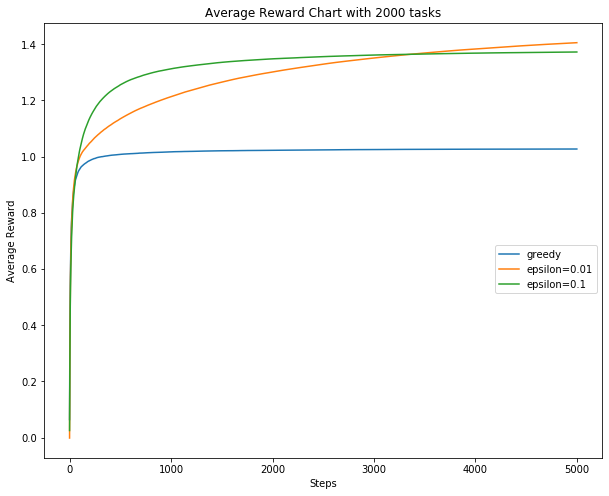


The arm with the maximum reward for the greedy selection was arm 8 with 19140
The arm with the maximum reward for the epsilon 0.01 selection was arm 10 with 20117
The arm with the maximum reward for the epsilon 0.1 selection was arm 6 with 19154
[8, 10, 6]
[19140, 20117, 19154]
Arm: 10
Max reward: 20117


In [71]:
# Gaussian distribution with 10-Arm Testbed
rtasks = 2000
armrewards = executeLearning(10, 5000, rtasks, None)
#print(f"\nThe maximum reward possible for this randomized version with {rtasks} tasks is {max_a}\n")
#print(armrewards[0])
gmaindex = np.argmax(armrewards[0])
print(f"\nThe arm with the maximum reward for the greedy selection was arm {gmaindex+1} with {int(armrewards[0][gmaindex])}")

#print(armrewards[1])
e01maindex = np.argmax(armrewards[1])
print(f"The arm with the maximum reward for the epsilon 0.01 selection was arm {e01maindex+1} with {int(armrewards[1][e01maindex])}")

#print(armrewards[2])
e1maindex = np.argmax(armrewards[2])
print(f"The arm with the maximum reward for the epsilon 0.1 selection was arm {e1maindex+1} with {int(armrewards[2][e1maindex])}")

# Determine the max reward and step that produced it
maxarms = [gmaindex+1, e01maindex+1, e1maindex+1]
maxvals = [ int(armrewards[0][gmaindex]), int(armrewards[1][e01maindex]), int(armrewards[2][e1maindex])]
print(maxarms)
print(maxvals)
maxval = max(maxvals)
maxarm = maxarms[maxvals.index(maxval)]
print(f"Arm: {maxarm}")
print(f"Max reward: {maxval}")



### Analysis for Average Reward for Randomized rewards along Gaussian distribution

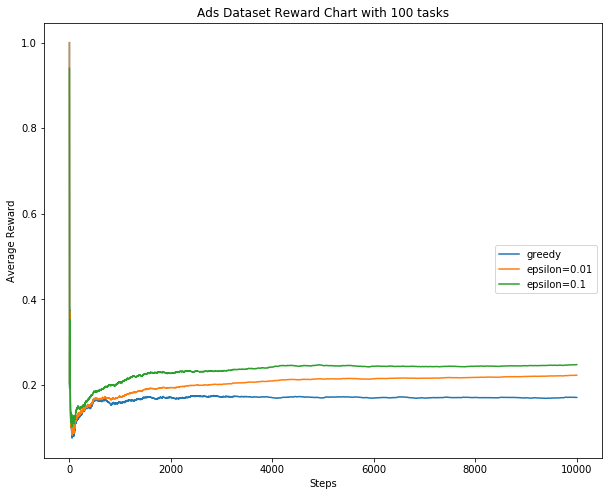


The arm with the maximum reward for the greedy selection was arm 1 with 1703
The arm with the maximum reward for the epsilon 0.01 selection was arm 5 with 2666
The arm with the maximum reward for the epsilon 0.1 selection was arm 5 with 2464
[1, 5, 5]
[1703, 2666, 2464]
Arm: 5
Max reward: 2666


In [70]:
# Ads dataset
ads = pd.read_csv('Ads_Optimisation.csv')
atasks = 100
armrewards = executeLearning(len(ads.columns), len(ads.index), atasks, ads)
#print(f"\nThe maximum reward possible for this ads dataset with {atasks} tasks is {max_r}")

gmaindex = np.argmax(armrewards[0])
print(f"\nThe arm with the maximum reward for the greedy selection was arm {gmaindex+1} with {int(armrewards[0][gmaindex])}")

#print(armrewards[1])
e01maindex = np.argmax(armrewards[1])
print(f"The arm with the maximum reward for the epsilon 0.01 selection was arm {e01maindex+1} with {int(armrewards[1][e01maindex])}")

#print(armrewards[2])
e1maindex = np.argmax(armrewards[2])
print(f"The arm with the maximum reward for the epsilon 0.1 selection was arm {e1maindex+1} with {int(armrewards[2][e1maindex])}")

# Determine the max reward and step that produced it
maxarms = [gmaindex+1, e01maindex+1, e1maindex+1]
maxvals = [ int(armrewards[0][gmaindex]), int(armrewards[1][e01maindex]), int(armrewards[2][e1maindex])]
print(maxarms)
print(maxvals)
maxval = max(maxvals)
maxarm = maxarms[maxvals.index(maxval)]
print(f"Arm: {maxarm}")
print(f"Max reward: {maxval}")



## Analysis for Average Reward for the Ads dataset